First of all, apply the most appropriate one of the techniques for completing the missing values in your previous lesson. In order to answer the following questions, you must overcome the missing data.

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats.mstats import winsorize
warnings.filterwarnings('ignore')

states = pd.read_csv("datasets_95317_1078789_states_all.csv").reset_index()
display(states.head(15))
print('*'*125)
states.info()
print('*'*75)
print(states.isnull().sum())

,index,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN
6,6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,...,38058.0,33691.0,28366.0,NaN,NaN,488476.0,227.0,274.0,222.0,NaN
7,7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,...,8272.0,8012.0,6129.0,NaN,NaN,104321.0,218.0,263.0,213.0,NaN
8,8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,...,5832.0,5000.0,3433.0,NaN,NaN,80937.0,193.0,235.0,188.0,NaN
9,9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,...,164416.0,142372.0,100835.0,NaN,NaN,1981407.0,214.0,260.0,208.0,NaN


*****************************************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         1715 non-null   int64  
 1   PRIMARY_KEY                   1715 non-null   object 
 2   STATE                         1715 non-null   object 
 3   YEAR                          1715 non-null   int64  
 4   ENROLL                        1224 non-null   float64
 5   TOTAL_REVENUE                 1275 non-null   float64
 6   FEDERAL_REVENUE               1275 non-null   float64
 7   STATE_REVENUE                 1275 non-null   float64
 8   LOCAL_REVENUE                 1275 non-null   float64
 9   TOTAL_EXPENDITURE             1275 non-null   float64
 10  INSTRUCTION_EXPENDITURE       1275 non-null   float64


Analize başlamadan önce veriye dair bilgi edinmek için veri setini inceledim.
Veride önemli ölçüde kayıp değerler var bu yüzden kayıp verileri eyaletlere göre gruplayıp ortalamalarını alarak doldurmaya karar verdim. Yıllara göre alırsak eyaletleri karışık almış oluruz. 

In [115]:
states2=states.copy()

columns =   ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]
for col in columns:
    for j in states2["STATE"].unique():
        states2[col] = states2[col].fillna(states2.groupby(states['STATE']==j)[col].transform("mean"))


1-Interpret the data by making univariate analysis and indicate the points you consider important.

In [116]:
#Describe metodu ile tek değişkenli analiz


display(states2.describe(include="all"))

#Kategorik ve numerik değerler görmekteyiz. Kategorik olanların sadece 4 satırı doldurulmuş 


,index,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.000000,1715,1715,1715.000000,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,...,1715.000000,1715.000000,1715.000000,1.715000e+03,1.715000e+03,1.715000e+03,565.000000,602.000000,650.000000,562.000000
unique,NaN,1715,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,1999_OREGON,ARIZONA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,857.000000,NaN,NaN,2002.075219,9.176091e+05,9.103372e+06,7.678411e+05,4.224129e+06,4.111402e+06,9.207554e+06,...,69170.809205,68110.451386,58425.778639,5.779970e+05,2.820947e+05,9.140347e+05,236.327434,278.280731,218.806154,263.558719
std,495.222172,NaN,NaN,9.568621,9.009931e+05,1.014145e+07,9.889356e+05,4.785199e+06,4.735584e+06,1.034235e+07,...,77998.508556,76055.121122,65786.214949,5.211573e+05,2.613610e+05,1.030019e+06,9.285505,10.343482,7.681805,6.612601
min,0.000000,NaN,NaN,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,...,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,428.500000,NaN,NaN,1994.000000,4.646880e+05,2.992297e+06,2.602770e+05,1.618602e+06,1.162580e+06,3.004448e+06,...,20486.500000,20518.500000,17949.000000,3.158105e+05,1.457900e+05,2.800010e+05,232.000000,272.000000,215.000000,260.000000
50%,857.000000,NaN,NaN,2002.000000,9.161300e+05,8.248199e+06,6.775700e+05,3.867404e+06,3.493175e+06,8.248660e+06,...,51999.000000,50447.000000,40774.000000,5.802207e+05,2.834425e+05,6.809780e+05,238.000000,280.500000,220.000000,265.000000
75%,1285.500000,NaN,NaN,2010.000000,9.211607e+05,9.173169e+06,7.710605e+05,4.244454e+06,4.157654e+06,9.276561e+06,...,77052.000000,76719.500000,68023.000000,5.802207e+05,2.834425e+05,1.002840e+06,242.000000,286.000000,224.000000,268.000000


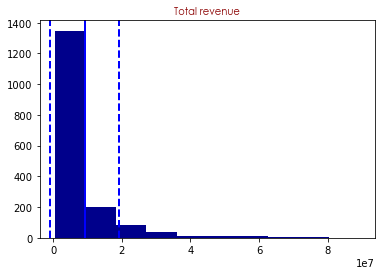

'\n    Histogramdan anlaşılacağı üzere veri normal dağılıma uymamaktadır. \n    Aynı zamanda bazı değerlerin ortalamanın uzağında olduğu görülmektedir.\n    Buna bakarak aykırı değerlerin var olduğunu düşünebiliriz,\n    fakat sağlamasını istatisiki değerlerle ya da boxplot yardımı ile yapmamız gerekir.\n'

In [117]:
#Şimdi bir sütun alıp oradaki ölçüleri karşılaştıracağım
title_style_small = {'family': 'Century Gothic', 'color': 'darkred', 'size': 10 }
axis_style_small  = {'family': 'Century Gothic', 'color': 'darkblue', 'size': 7 }

plt.title('Total revenue',fontdict = title_style_small )
plt.hist(states2["TOTAL_REVENUE"], color = "darkblue")

plt.axvline(np.mean(states2.TOTAL_REVENUE), color='b', linestyle='solid', linewidth=2)
plt.axvline(np.mean(states2.TOTAL_REVENUE) + np.std(states2.TOTAL_REVENUE), 
            color='b', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(states2.TOTAL_REVENUE) - np.std(states2.TOTAL_REVENUE), 
            color='b', linestyle='dashed', linewidth=2)

plt.show()


"""
    Histogramdan anlaşılacağı üzere veri normal dağılıma uymamaktadır. 
    Aynı zamanda bazı değerlerin ortalamanın uzağında olduğu görülmektedir.
    Buna bakarak aykırı değerlerin var olduğunu düşünebiliriz,
    fakat sağlamasını istatisiki değerlerle ya da boxplot yardımı ile yapmamız gerekir.
"""

In [118]:
#Şimdi aşağıdaki sorulara göre gerekli olabilecek verilerin aykırı değerlerini tukey metodu inceleyelim 

def tukeymethod(data):
    q75, q25 = np.percentile(data, [75 ,25])
    IQR = q75 - q25
    threshold_values=[]
    for threshold_value in np.arange(1,5,0.5):
        min_value = q25 - (IQR*threshold_value)
        max_value = q75 + (IQR*threshold_value)
        outlier_value_number = len((np.where((data > max_value)| (data < min_value))[0]))
        threshold_values.append({'threshold_value': threshold_value,'outlier_value_number': outlier_value_number})
    pd.DataFrame(threshold_values)

    return threshold_values

In [119]:
x= tukeymethod(states2["AVG_MATH_4_SCORE"])
display(pd.DataFrame(x),"\n")
x= tukeymethod(states2["AVG_READING_4_SCORE"])
pd.DataFrame(x)

,threshold_value,outlier_value_number
0,1.0,0
1,1.5,0
2,2.0,0
3,2.5,0
4,3.0,0
5,3.5,0
6,4.0,0
7,4.5,0


'\n'

,threshold_value,outlier_value_number
0,1.0,0
1,1.5,0
2,2.0,0
3,2.5,0
4,3.0,0
5,3.5,0
6,4.0,0
7,4.5,0


2-Consider a state (eg California) and plot the yearly change of total revenues and total spending. Do these two variables change by years? Do you have years of summit and bottom?

In [122]:
states.dropna()
states3=states2.groupby(by="YEAR").sum()[["TOTAL_REVENUE","TOTAL_EXPENDITURE"]].sort_values("YEAR").reset_index()

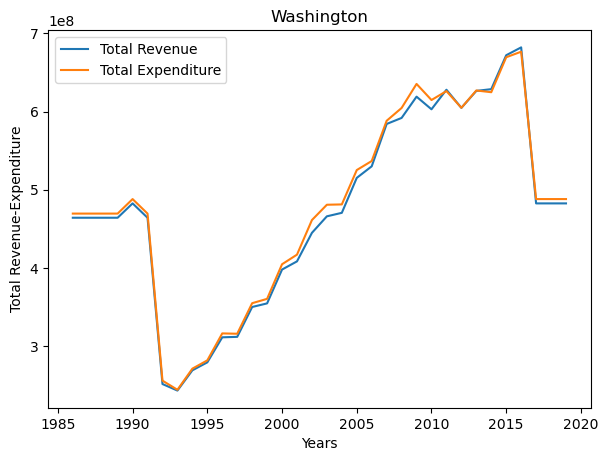

'\n    Gelir ve gider harcamaları dengeli olarak devam etmiş. \n    Grafiğe bakarak her iki verininde en yüksek 2015-2020 arasında, en düşük ise 1985-1990 yılları olarak gözlemlenmiştir.\n'

In [124]:
plt.figure(figsize=(7,5), dpi=100)
plt.title("Washington")
plt.xlabel("Years")
plt.ylabel("Total Revenue-Expenditure")
plt.plot(states3["YEAR"],states3["TOTAL_REVENUE"], label="Total Revenue")
plt.plot(states3["YEAR"],states3["TOTAL_EXPENDITURE"], label="Total Expenditure")
plt.legend()

plt.show()



"""
    Gelir ve gider harcamaları dengeli olarak devam etmiş. 
    Grafiğe bakarak her iki verininde en yüksek 2015-2020 arasında, en düşük ise 1985-1990 yılları olarak gözlemlenmiştir.
"""


3-In which course are students more successful in your chosen state? Mathematics or reading?

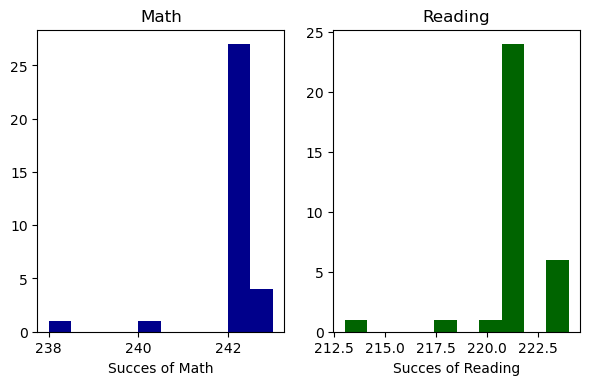

Math average: 242.33333333333331
Reading average: 221.58333333333331


In [141]:
"""

Burada tekrar boş değerleri doldurmamın sebebi, daha önce eyaletlere göre ortalama eklediğimde bazı eyaletlerin
tamamen null değerlere sahip olması nedeniyle boş değerleri doldurulmamasıdır..

Boş değerlerin olmadığından emin oldum. 

Şimdi aykırı değerleri yok ettikten sonra başarı oranlarına bakacağım.

Oralamalara bakıldığında matematik dersinde daha başarılı olduğu görülür. 

"""

states4=pd.read_csv("datasets_95317_1078789_states_all.csv", index_col=0).reset_index()
washington=states4[states4["STATE"]=="WASHINGTON"].sort_values("YEAR").reset_index()


washington["AVG_MATH_4_SCORE"].fillna(washington["AVG_MATH_4_SCORE"].mean(),inplace=True)
washington["AVG_READING_4_SCORE"].fillna(washington["AVG_READING_4_SCORE"].mean(),inplace=True)

plt.figure(figsize=(7,4), dpi=100)

plt.subplot(1,2,1)
plt.title("Math")
plt.xlabel("Succes of Math")
plt.hist(winsorize(washington["AVG_MATH_4_SCORE"], (0,0.10)), color="darkblue")



plt.subplot(1,2,2)
plt.title("Reading")
plt.xlabel("Succes of Reading")
plt.hist(winsorize(washington["AVG_READING_4_SCORE"], (0,0.10)), color="darkgreen")

plt.show()

print("Math average:",winsorize(washington["AVG_MATH_4_SCORE"].mean()))
print("Reading average:",winsorize(washington["AVG_READING_4_SCORE"].mean()))

4-What is the distribution of mathematics and reading grades?

Normal dağılıma uymamaktadır ve her iki derste de negarif çarpıklık var ve medyan> ( μ ).

5-You may have noticed that there are many missing values in the mathematics and reading notes. Complete the missing values with mean, median, and interpolation. Compare the impact of these techniques on the distribution of grades.


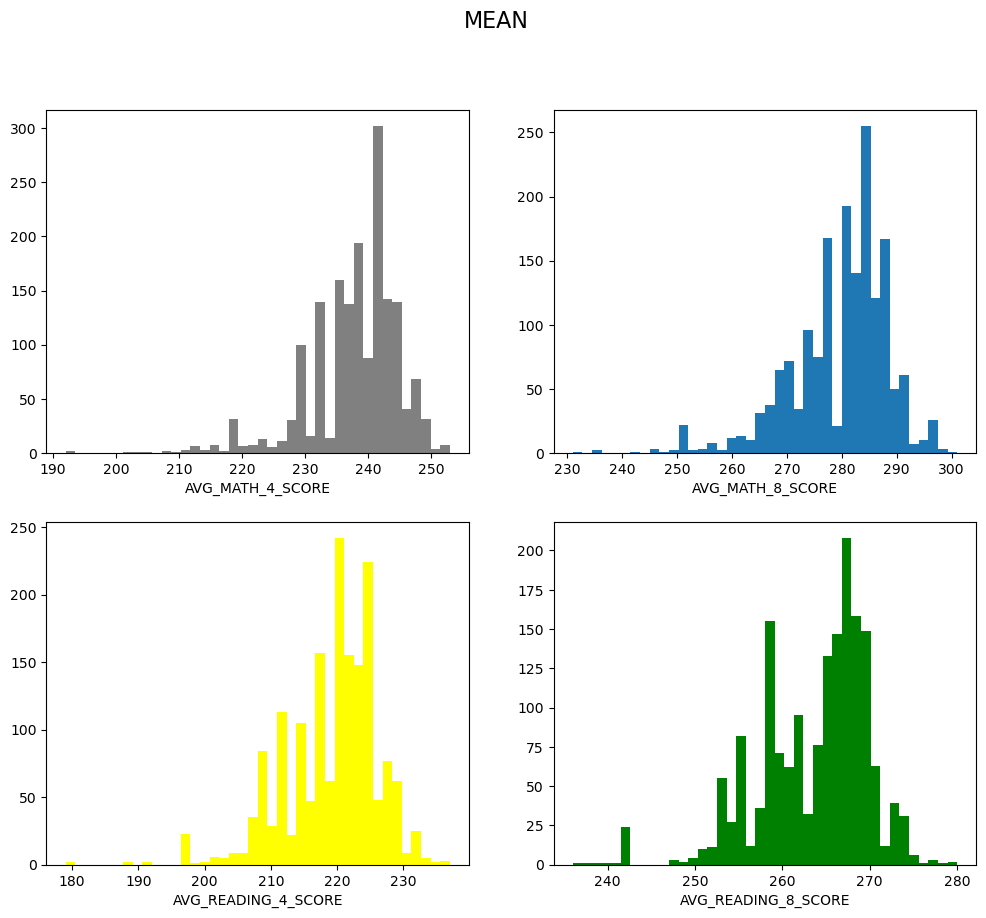

In [148]:
plt.figure(figsize=(12,10), dpi=100)


plt.subplot(2,2,1)
plt.xlabel("AVG_MATH_4_SCORE")
states.fillna(states.groupby("STATE").transform("mean"),inplace=True)
plt.hist(states["AVG_MATH_4_SCORE"], bins=40,color="gray")

plt.subplot(2,2,2)
plt.xlabel("AVG_MATH_8_SCORE")
states.fillna(states.groupby("STATE").transform("mean"),inplace=True)
plt.hist(states["AVG_MATH_8_SCORE"], bins=40)

plt.subplot(2,2,3)
plt.xlabel("AVG_READING_4_SCORE")
states.fillna(states.groupby("STATE").transform("mean"),inplace=True)
plt.hist(states["AVG_READING_4_SCORE"], bins=40,color="yellow")

plt.subplot(2,2,4)
plt.xlabel("AVG_READING_8_SCORE")
states.fillna(states.groupby("STATE").transform("mean"),inplace=True)
plt.hist(states["AVG_READING_8_SCORE"], bins=40,color="green")
plt.suptitle('MEAN', fontsize=16)

plt.show()


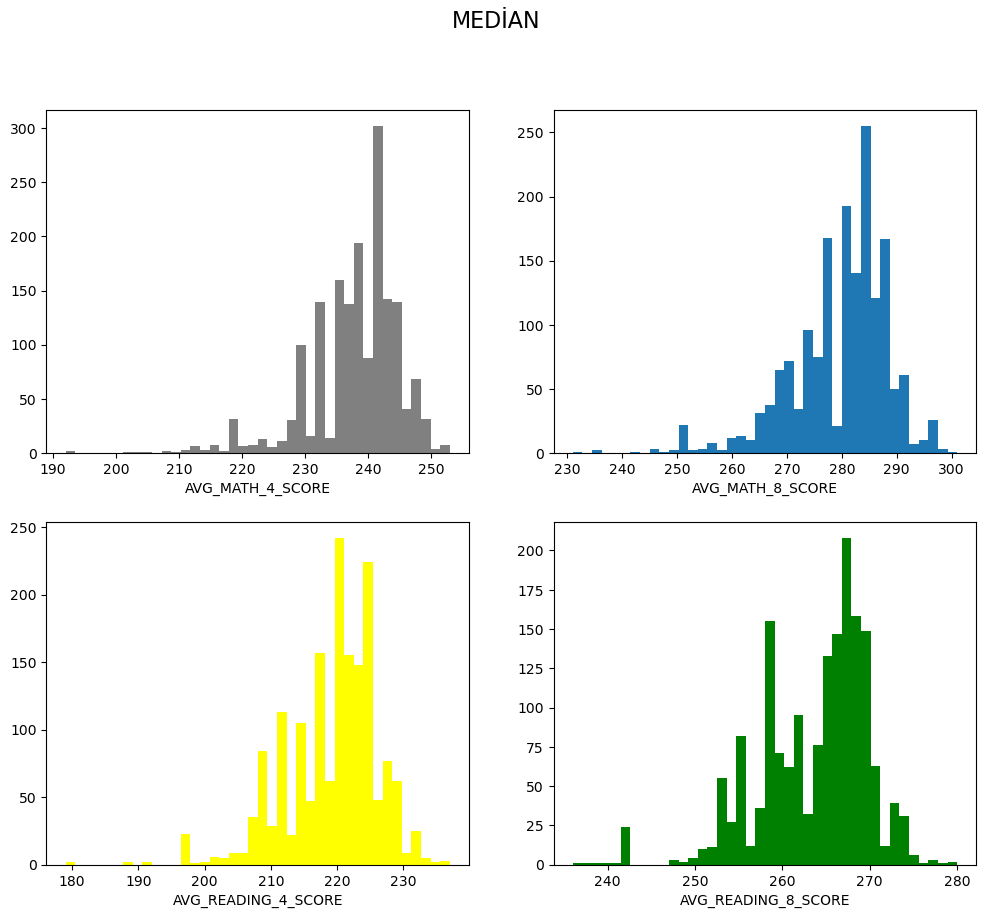

In [150]:

plt.figure(figsize=(12,10), dpi=100)

plt.subplot(2,2,1)
plt.xlabel("AVG_MATH_4_SCORE")
states.fillna(states.groupby("STATE").transform("median"),inplace=True)
plt.hist(states["AVG_MATH_4_SCORE"], bins=40,color="gray")

plt.subplot(2,2,2)
plt.xlabel("AVG_MATH_8_SCORE")
states.fillna(states.groupby("STATE").transform("median"),inplace=True)
plt.hist(states["AVG_MATH_8_SCORE"], bins=40)

plt.subplot(2,2,3)
plt.xlabel("AVG_READING_4_SCORE")
states.fillna(states.groupby("STATE").transform("median"),inplace=True)
plt.hist(states["AVG_READING_4_SCORE"], bins=40,color="yellow")

plt.subplot(2,2,4)
plt.xlabel("AVG_READING_8_SCORE")
states.fillna(states.groupby("STATE").transform("median"),inplace=True)
plt.hist(states["AVG_READING_8_SCORE"], bins=40,color="green")
plt.suptitle('MEDİAN', fontsize=16)

plt.show()


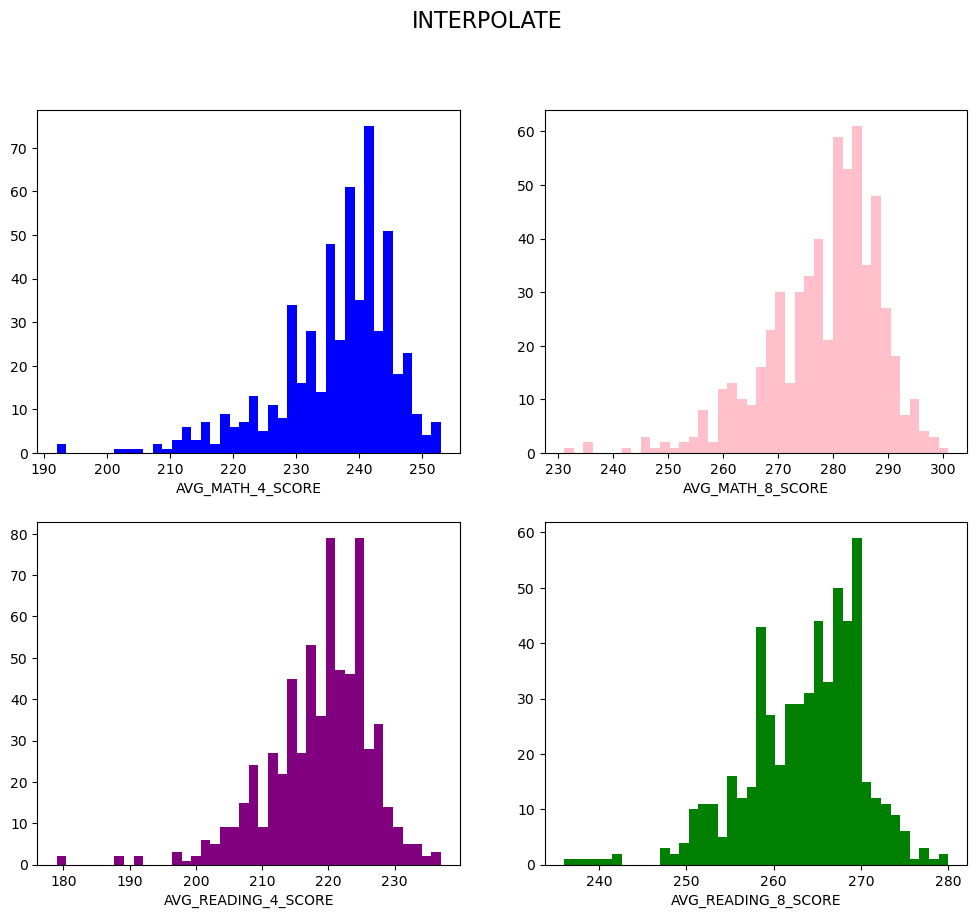

In [152]:
states6 = pd.read_csv("datasets_95317_1078789_states_all.csv")


states6.interpolate(method='linear', limit_direction='forward', axis=0)

plt.figure(figsize=(12,10), dpi=100)


plt.subplot(2,2,1)
plt.xlabel("AVG_MATH_4_SCORE")
plt.hist(states6["AVG_MATH_4_SCORE"], bins=40, color="blue")


plt.subplot(2,2,2)
plt.xlabel("AVG_MATH_8_SCORE")
plt.hist(states6["AVG_MATH_8_SCORE"], bins=40, color="pink")


plt.subplot(2,2,3)
plt.xlabel("AVG_READING_4_SCORE")
plt.hist(states6["AVG_READING_4_SCORE"], bins=40, color="purple")

plt.subplot(2,2,4)
plt.xlabel("AVG_READING_8_SCORE")
plt.hist(states6["AVG_READING_8_SCORE"], bins=40, color="green")
plt.suptitle('INTERPOLATE', fontsize=16)

plt.show()